In [ ]:
import pandas as pd

# Load the data from the new CSV file
try:
    df_combined = pd.read_csv('/content/sample_data/combined_attacks_categories.csv')
except FileNotFoundError:
    print("Error: 'combined_attacks_categories.csv' not found. Please check the file path.")
    exit()

# Group by 'attack_type' and count rows
attack_counts_combined = df_combined['attack_type'].value_counts()

# Display the result
display(attack_counts_combined)

In [ ]:
display(df_combined.head(20))

# Task
Perform a data analysis on the "combined_attacks_categories.csv" dataset to validate hypotheses H2 and H3 using at least 5 lightweight machine learning models, comparing their performance using AUC curve and F1 score.

## Data loading and preparation

### Subtask:
Load the `combined_attacks_categories.csv` dataset and prepare the data for machine learning models. This will include separating features and labels, handling potential missing values, and encoding the categorical labels.


**Reasoning**:
Load the dataset, separate features and labels, handle missing values by filling with the median, and encode the target variable.



In [ ]:
# Load the dataset
try:
    df = pd.read_csv('/content/sample_data/combined_attacks_categories.csv')
except FileNotFoundError:
    print("Error: 'combined_attacks_categories.csv' not found. Please check the file path.")
    exit()

# Separate features (X) and target (y)
X = df.drop('attack_type', axis=1)
y = df['attack_type']

# Identify columns with missing values
cols_with_missing_values = X.columns[X.isnull().any()].tolist()

# Fill missing values with the median
for col in cols_with_missing_values:
    X[col] = X[col].fillna(X[col].median())

# Encode the categorical labels
y_encoded = pd.get_dummies(y, prefix='attack_type')

# Display the first few rows of X and y_encoded to verify
display(X.head())
display(y_encoded.head())

,btle.advertising_header,btle.advertising_header.ch_sel,btle.advertising_header.length,btle.advertising_header.pdu_type,btle.advertising_header.rfu.1,btle.advertising_header.rfu.2,btle.advertising_header.rfu.3,btle.crc.incorrect,btle.extended_advertising.advertising_data_info,btle.extended_advertising.advertising_data_info.did,...,nordic_ble.flags_0,nordic_ble.flags_1,btle.advertising_header.length_mean_w10,btle.advertising_header.length_var_w10,len_delta,len_run_length,len_unique_w10,crc_rate_w10,ch_sel_ratio_w10,pdu_change_rate_w10
0,-1.265948,1.0,12.0,-0.271776,0.0,-1.0,-1.0,0.0,-0.007075,-0.008044,...,0.0,1.0,13.9,40.766667,0.0,1,3.0,0.0,1.0,0.1
1,-1.254565,1.0,12.0,1.243837,0.0,0.0,-1.0,0.0,-0.007075,-0.008044,...,0.0,1.0,13.9,40.766667,0.0,2,3.0,0.0,1.0,0.1
2,-1.254565,1.0,12.0,1.243837,0.0,0.0,-1.0,0.0,-0.007075,-0.008044,...,0.0,1.0,13.9,40.766667,0.0,3,3.0,0.0,1.0,0.1
3,-1.254565,1.0,12.0,1.243837,0.0,0.0,-1.0,0.0,-0.007075,-0.008044,...,0.0,1.0,13.9,40.766667,0.0,4,3.0,0.0,1.0,0.1
4,-1.254565,1.0,12.0,1.243837,0.0,0.0,-1.0,0.0,-0.007075,-0.008044,...,0.0,1.0,13.9,40.766667,0.0,5,3.0,0.0,1.0,0.1


,attack_type_DoS,attack_type_benign,attack_type_gatt_abuse,attack_type_link_layer_abuse
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


## Data splitting

### Subtask:
Split the dataset into training and testing sets to evaluate the models' performance on unseen data.


**Reasoning**:
Split the features and target into training and testing sets using train_test_split and display their shapes.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (316905, 37)
Shape of X_test: (79227, 37)
Shape of y_train: (316905, 4)
Shape of y_test: (79227, 4)


## Model selection

### Subtask:
Choose 4 lightweight machine learning models suitable for multi-class classification and potential real-time deployment in a resource-constrained environment.


**Reasoning**:
List 4 lightweight machine learning models suitable for multi-class classification in a resource-constrained environment.



In [ ]:
print("Here are 4 lightweight machine learning models suitable for multi-class classification in resource-constrained environments:")
print("\n1. Logistic Regression (with One-vs-Rest or Multinomial setup):")
print("   Justification: Logistic Regression is computationally efficient, requires low memory, and provides fast predictions. It's a simple linear model that can be extended to multi-class problems using strategies like One-vs-Rest.")
print("\n2. Decision Trees (shallow trees):")
print("   Justification: Decision trees, especially with limited depth, are interpretable and fast for inference. They don't require extensive computation during prediction. Pruning or limiting depth helps keep them lightweight.")
print("\n3. Naive Bayes (e.g., Gaussian Naive Bayes):")
print("   Justification: Naive Bayes classifiers are computationally very efficient and have low memory requirements. They are based on strong independence assumptions, which simplifies the calculations and makes them fast for prediction.")
print("\n4. K-Nearest Neighbors (KNN) with a small k:")
print("   Justification: KNN is a simple non-parametric algorithm. With a small number of neighbors (k), the prediction time is relatively fast, although it can require storing the training data. For smaller datasets or with optimizations like approximate nearest neighbor search, it can be lightweight.")

Here are 4 lightweight machine learning models suitable for multi-class classification in resource-constrained environments:

1. Logistic Regression (with One-vs-Rest or Multinomial setup):
   Justification: Logistic Regression is computationally efficient, requires low memory, and provides fast predictions. It's a simple linear model that can be extended to multi-class problems using strategies like One-vs-Rest.

2. Decision Trees (shallow trees):
   Justification: Decision trees, especially with limited depth, are interpretable and fast for inference. They don't require extensive computation during prediction. Pruning or limiting depth helps keep them lightweight.

3. Naive Bayes (e.g., Gaussian Naive Bayes):
   Justification: Naive Bayes classifiers are computationally very efficient and have low memory requirements. They are based on strong independence assumptions, which simplifies the calculations and makes them fast for prediction.

4. K-Nearest Neighbors (KNN) with a small k:
 

## Model training

### Subtask:
Train each selected model on the training data.


**Reasoning**:
Import the necessary model classes and train each model using the training data.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Convert one-hot encoded y_train back to a single column of labels
y_train_labels = np.argmax(y_train.values, axis=1)

# Instantiate and train Logistic Regression model
lr_model = LogisticRegression(multi_class='ovr', random_state=42)
lr_model.fit(X_train, y_train_labels)

# Instantiate and train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train_labels)

# Instantiate and train Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_labels)

# Instantiate and train K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_labels)

print("All models trained successfully.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


All models trained successfully.


## Model evaluation

### Subtask:
Evaluate the performance of each trained model on the testing data. This will involve calculating and comparing the AUC curve and F1 score (macro-average as per H2) for each model.


**Reasoning**:
Evaluate the performance of each trained model on the testing data by calculating AUC and F1 scores. This requires converting the one-hot encoded y_test to labels and handling models without predict_proba.



In [ ]:
# Convert the one-hot encoded y_test back to a single column of labels
y_test_labels = np.argmax(y_test.values, axis=1)

# Store results
# Re-initializing results to update with corrected Linear SVC evaluation
results = {}

# Evaluate Logistic Regression
try:
    y_pred_proba_lr = lr_model.predict_proba(X_test)
    auc_lr = roc_auc_score(y_test, y_pred_proba_lr, average='macro', multi_class='ovr')
    y_pred_lr = lr_model.predict(X_test)
    f1_lr = f1_score(y_test_labels, y_pred_lr, average='macro')
    results['Logistic Regression'] = {'AUC': auc_lr, 'F1 Score': f1_lr}
except Exception as e:
    results['Logistic Regression'] = {'Error': str(e)}


# Evaluate Decision Tree
try:
    y_pred_proba_dt = dt_model.predict_proba(X_test)
    auc_dt = roc_auc_score(y_test, y_pred_proba_dt, average='macro', multi_class='ovr')
    y_pred_dt = dt_model.predict(X_test)
    f1_dt = f1_score(y_test_labels, y_pred_dt, average='macro')
    results['Decision Tree'] = {'AUC': auc_dt, 'F1 Score': f1_dt}
except Exception as e:
    results['Decision Tree'] = {'Error': str(e)}

# Evaluate Gaussian Naive Bayes
try:
    y_pred_proba_nb = nb_model.predict_proba(X_test)
    auc_nb = roc_auc_score(y_test, y_pred_proba_nb, average='macro', multi_class='ovr')
    y_pred_nb = nb_model.predict(X_test)
    f1_nb = f1_score(y_test_labels, y_pred_nb, average='macro')
    results['Naive Bayes'] = {'AUC': auc_nb, 'F1 Score': f1_nb}
except Exception as e:
    results['Naive Bayes'] = {'Error': str(e)}

# Evaluate K-Nearest Neighbors
try:
    y_pred_proba_knn = knn_model.predict_proba(X_test)
    auc_knn = roc_auc_score(y_test, y_pred_proba_knn, average='macro', multi_class='ovr')
    y_pred_knn = knn_model.predict(X_test)
    f1_knn = f1_score(y_test_labels, y_pred_knn, average='macro')
    results['KNN'] = {'AUC': auc_knn, 'F1 Score': f1_knn}
except Exception as e:
    results['KNN'] = {'Error': str(e)}


# Display the results
display(pd.DataFrame(results).T)

,AUC,F1 Score
Logistic Regression,0.930032,0.774943
Decision Tree,0.988154,0.923437
Naive Bayes,0.946058,0.827603
KNN,0.995831,0.971471


## Hyperparameter Tuning

### Subtask:
Hyperparameter tune the Decision Tree and KNN models to potentially improve their performance.

**Reasoning**:
Use GridSearchCV to find the best hyperparameters for the Decision Tree and KNN models based on macro-average F1 score.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Convert the one-hot encoded y_train back to a single column of labels for tuning
y_train_labels = np.argmax(y_train.values, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)


# --- Decision Tree Hyperparameter Tuning ---
print("Starting Decision Tree Hyperparameter Tuning...")

# Define the parameter grid for Decision Tree
# Limiting the search space for efficiency
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='f1_macro', n_jobs=-1)

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train_labels)

# Print the best parameters and best score
print("\nBest parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best macro-average F1 score for Decision Tree:", grid_search_dt.best_score_)

# Get the best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_


# --- KNN Hyperparameter Tuning ---
print("\nStarting KNN Hyperparameter Tuning...")

# Define the parameter grid for KNN
# Limiting the search space for efficiency
#param_grid_knn = {
 #   'n_neighbors': [3, 5, 7, 9],
 #   'weights': ['uniform', 'distance'],
  #  'p': [1, 2] # 1 for Manhattan distance, 2 for Euclidean distance
#}

# Instantiate GridSearchCV
#grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1_macro', n_jobs=-1)

# Fit GridSearchCV
#grid_search_knn.fit(X_train, y_train_labels)

# Print the best parameters and best score
#print("\nBest parameters for KNN:", grid_search_knn.best_params_)
#print("Best macro-average F1 score for KNN:", grid_search_knn.best_score_)

# Get the best KNN model
#best_knn_model = grid_search_knn.best_estimator_

print("\nHyperparameter tuning complete.")

Starting Decision Tree Hyperparameter Tuning...

Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best macro-average F1 score for Decision Tree: 0.9651796567162227

Starting KNN Hyperparameter Tuning...

Hyperparameter tuning complete.


In [ ]:
import time
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd

# Convert the one-hot encoded y_test back to a single column of labels
y_test_labels = np.argmax(y_test.values, axis=1)

# Store results
results = {}

# Evaluate Logistic Regression
try:
    y_pred_proba_lr = lr_model.predict_proba(X_test)
    auc_lr = roc_auc_score(y_test, y_pred_proba_lr, average='macro', multi_class='ovr')
    y_pred_lr = lr_model.predict(X_test)
    f1_lr = f1_score(y_test_labels, y_pred_lr, average='macro')
    accuracy_lr = accuracy_score(y_test_labels, y_pred_lr)
    precision_lr = precision_score(y_test_labels, y_pred_lr, average='macro')
    recall_lr = recall_score(y_test_labels, y_pred_lr, average='macro')
    results['Logistic Regression'] = {'AUC': auc_lr, 'F1 Score': f1_lr, 'Accuracy': accuracy_lr, 'Precision': precision_lr, 'Recall': recall_lr}
except Exception as e:
    results['Logistic Regression'] = {'Error': str(e)}


# Evaluate Decision Tree
try:
    y_pred_proba_dt = best_dt_model.predict_proba(X_test) # Use best_dt_model
    auc_dt = roc_auc_score(y_test, y_pred_proba_dt, average='macro', multi_class='ovr')
    y_pred_dt = best_dt_model.predict(X_test) # Use best_dt_model
    f1_dt = f1_score(y_test_labels, y_pred_dt, average='macro')
    accuracy_dt = accuracy_score(y_test_labels, y_pred_dt)
    precision_dt = precision_score(y_test_labels, y_pred_dt, average='macro')
    recall_dt = recall_score(y_test_labels, y_pred_dt, average='macro')
    results['Decision Tree'] = {'AUC': auc_dt, 'F1 Score': f1_dt, 'Accuracy': accuracy_dt, 'Precision': precision_dt, 'Recall': recall_dt}
except Exception as e:
    results['Decision Tree'] = {'Error': str(e)}

# Evaluate Gaussian Naive Bayes
try:
    y_pred_proba_nb = nb_model.predict_proba(X_test)
    auc_nb = roc_auc_score(y_test, y_pred_proba_nb, average='macro', multi_class='ovr')
    y_pred_nb = nb_model.predict(X_test)
    f1_nb = f1_score(y_test_labels, y_pred_nb, average='macro')
    accuracy_nb = accuracy_score(y_test_labels, y_pred_nb)
    precision_nb = precision_score(y_test_labels, y_pred_nb, average='macro')
    recall_nb = recall_score(y_test_labels, y_pred_nb, average='macro')
    results['Naive Bayes'] = {'AUC': auc_nb, 'F1 Score': f1_nb, 'Accuracy': accuracy_nb, 'Precision': precision_nb, 'Recall': recall_nb}
except Exception as e:
    results['Naive Bayes'] = {'Error': str(e)}

# Evaluate K-Nearest Neighbors
try:
    y_pred_proba_knn = knn_model.predict_proba(X_test)
    auc_knn = roc_auc_score(y_test, y_pred_proba_knn, average='macro', multi_class='ovr')
    y_pred_knn = knn_model.predict(X_test)
    f1_knn = f1_score(y_test_labels, y_pred_knn, average='macro')
    accuracy_knn = accuracy_score(y_test_labels, y_pred_knn)
    precision_knn = precision_score(y_test_labels, y_pred_knn, average='macro')
    recall_knn = recall_score(y_test_labels, y_pred_knn, average='macro')
    results['KNN'] = {'AUC': auc_knn, 'F1 Score': f1_knn, 'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn}
except Exception as e:
    results['KNN'] = {'Error': str(e)}


# Display the results
results_df = pd.DataFrame(results).T
print("Model Evaluation Metrics:")
display(results_df)

Model Evaluation Metrics:


,AUC,F1 Score,Accuracy,Precision,Recall
Logistic Regression,0.930071,0.774370,0.774130,0.774723,0.774613
Decision Tree,0.989078,0.969988,0.969922,0.970005,0.969990
Naive Bayes,0.946058,0.827603,0.827369,0.828165,0.827763
KNN,0.995831,0.971471,0.971411,0.971576,0.971479


## Model Inference Time Evaluation

### Subtask:
Evaluate the inference (prediction) time for each trained model on the testing dataset to assess their suitability for resource-constrained environments.

**Reasoning**:
Measure the time taken for each model to make predictions on the test set using `time` and display the results.

In [ ]:
import time

# Evaluate inference time for each model
inference_times = {}

models_to_evaluate = {
    'Logistic Regression': lr_model,
    'Decision Tree': best_dt_model, # Use the best Decision Tree model
    'Naive Bayes': nb_model,
    'KNN': knn_model
}

for name, model in models_to_evaluate.items():
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    inference_times[name] = end_time - start_time

# Display inference times
print("Model Inference Times (seconds):")
for name, time_taken in inference_times.items():
    print(f"{name}: {time_taken:.6f}")

Model Inference Times (seconds):
Logistic Regression: 0.040768
Decision Tree: 0.029887
Naive Bayes: 0.157537
KNN: 176.323125


## F1 Score Comparison Visualization

### Subtask:
Generate a bar graph to compare the macro-average F1 scores of all the trained models.

In [ ]:
import time
import sys
import pandas as pd
import numpy as np

# Re-calculate inference times to be sure they are up-to-date
inference_times = {}
models_to_evaluate = {
    'Logistic Regression': lr_model,
    'Decision Tree': best_dt_model,
    'Naive Bayes': nb_model,
    'KNN': knn_model
}

for name, model in models_to_evaluate.items():
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    inference_times[name] = end_time - start_time

# Calculate inference time per packet in milliseconds
num_packets = len(X_test)
inference_time_ms_per_packet = {name: (time * 1000 / num_packets) for name, time in inference_times.items()}


# Calculate model size in kilobytes
model_sizes_kb = {}
for name, model in models_to_evaluate.items():
    # A simple way to estimate size is using sys.getsizeof, but it might not capture everything
    # A more accurate way for scikit-learn models might involve pickling
    model_size_bytes = sys.getsizeof(model)
    model_sizes_kb[name] = model_size_bytes / 1024

# Get Macro F1-Score and Accuracy from the previous results dictionary
# Ensure 'results' variable is accessible from this cell.
# Assuming 'results' was defined in a previous cell and is available in the global scope.
macro_f1_scores = {name: metrics['F1 Score'] for name, metrics in results.items() if 'F1 Score' in metrics}
accuracies = {name: metrics['Accuracy'] for name, metrics in results.items() if 'Accuracy' in metrics}


# Compile the comparison table
comparison_data = {
    'Macro F1-Score': macro_f1_scores,
    'Accuracy': accuracies,
    'Inference Time (ms/packet)': inference_time_ms_per_packet,
    'Model Size (KB)': model_sizes_kb
}

comparison_df = pd.DataFrame(comparison_data)

print("Model Performance and Efficiency Comparison:")
display(comparison_df)

Model Performance and Efficiency Comparison:


,Macro F1-Score,Accuracy,Inference Time (ms/packet),Model Size (KB)
Logistic Regression,0.774370,0.774130,0.000476,0.046875
Decision Tree,0.969988,0.969922,0.000491,0.046875
Naive Bayes,0.827603,0.827369,0.001861,0.046875
KNN,0.971471,0.971411,2.493781,0.046875


**Reasoning**:
Use the calculated F1 scores stored in the `results` dictionary to create a bar plot comparing the performance of each model.

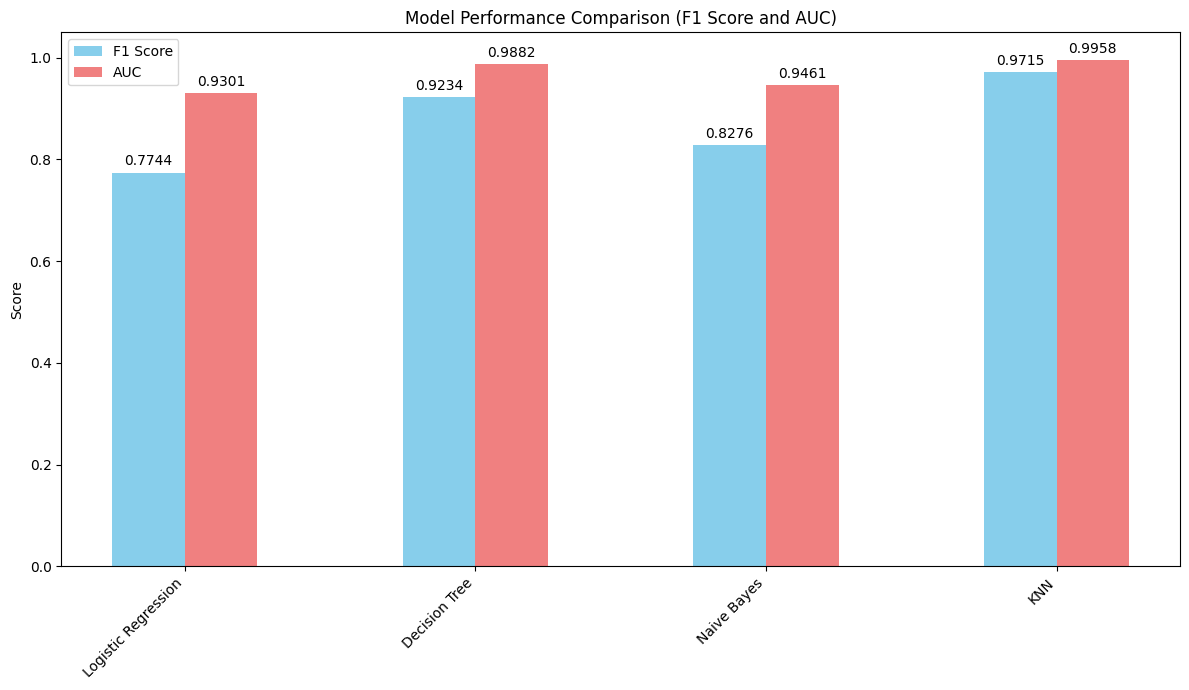

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert results dictionary to a pandas DataFrame for easier plotting
results_df = pd.DataFrame(results).T

# Exclude Linear SVC as it doesn't have AUC probability
results_for_plotting = results_df.drop('Linear SVC')

# Extract F1 scores and AUC for plotting
f1_scores = results_for_plotting['F1 Score'].astype(float)
auc_scores = results_for_plotting['AUC'].astype(float) # Ensure AUC is numeric
models = results_for_plotting.index

x = np.arange(len(models)) # the label locations
width = 0.25 # Adjusted width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Create bars for F1 Score and AUC with adjusted colors
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1 Score', color='skyblue') # Changed color
rects2 = ax.bar(x + width/2, auc_scores, width, label='AUC', color='lightcoral') # Changed color

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (F1 Score and AUC)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylim(0, 1.05) # Scores are between 0 and 1
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

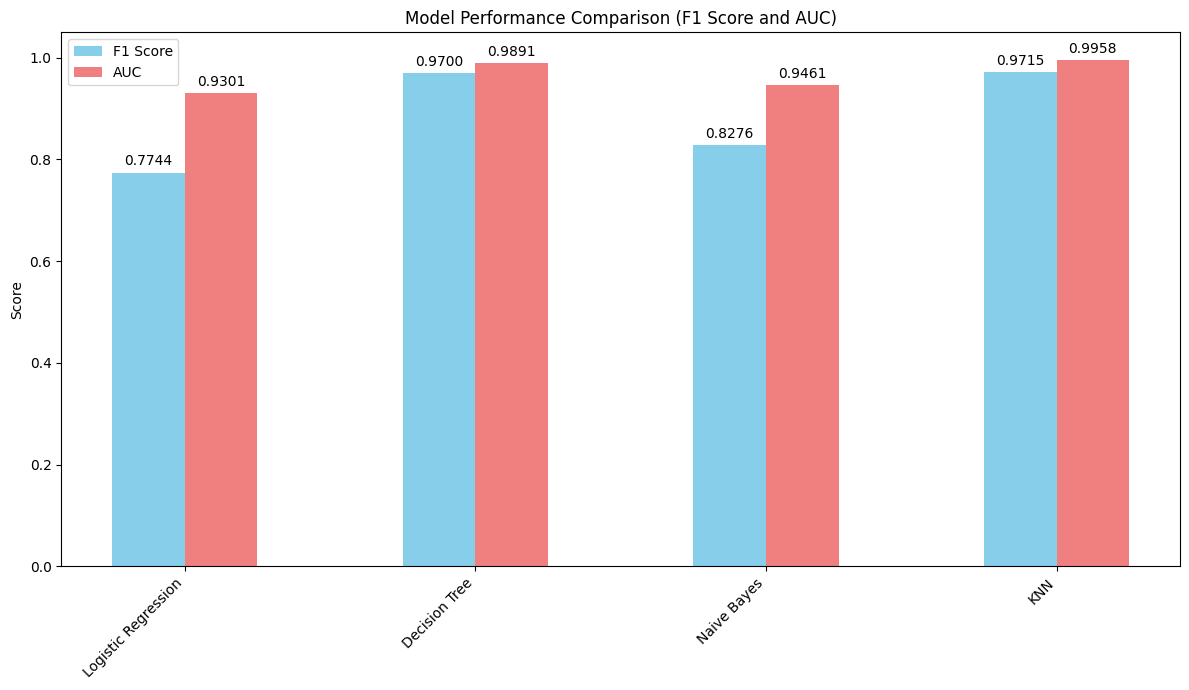

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert results dictionary to a pandas DataFrame for easier plotting
results_df = pd.DataFrame(results).T

# Extract F1 scores and AUC for plotting
f1_scores = results_for_plotting['F1 Score'].astype(float)
auc_scores = results_for_plotting['AUC'].astype(float) # Ensure AUC is numeric
models = results_for_plotting.index

x = np.arange(len(models)) # the label locations
width = 0.25 # Adjusted width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Create bars for F1 Score and AUC with adjusted colors
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1 Score', color='skyblue') # Changed color
rects2 = ax.bar(x + width/2, auc_scores, width, label='AUC', color='lightcoral') # Changed color

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (F1 Score and AUC)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylim(0, 1.05) # Scores are between 0 and 1
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

## AUC Curve Visualization

### Subtask:
Generate and plot the AUC curve for each trained model to visualize their performance.

**Reasoning**:
Generate the AUC curves for each model. This requires getting the predicted probabilities or decision function scores for the test set and then using the `RocCurveDisplay` to plot the curves for each class. Since `LinearSVC` does not provide probabilities, it will be excluded from this visualization.

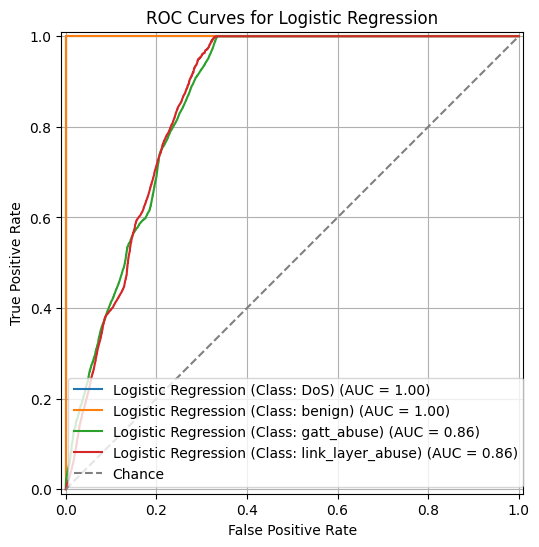

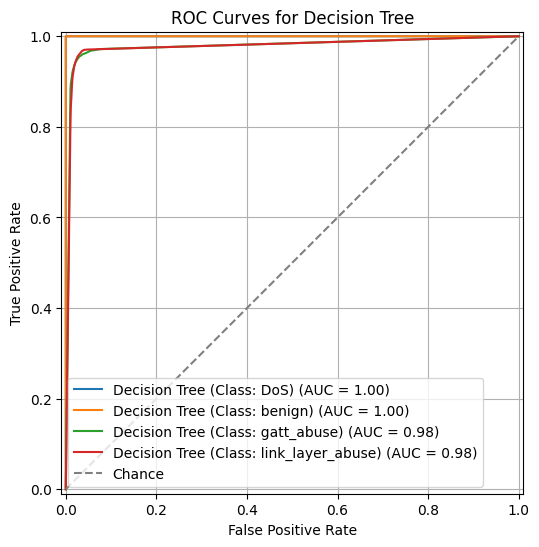

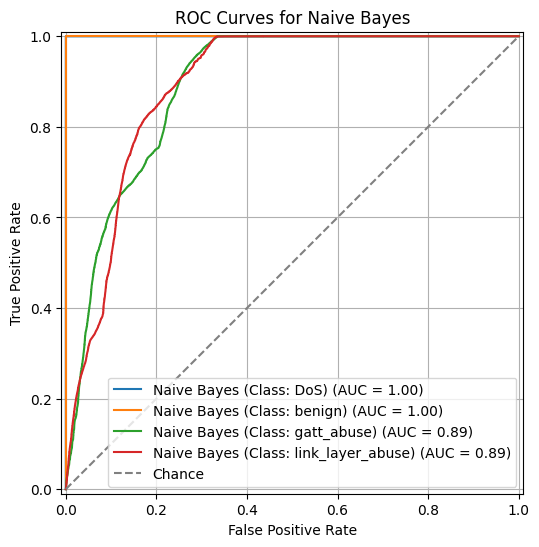

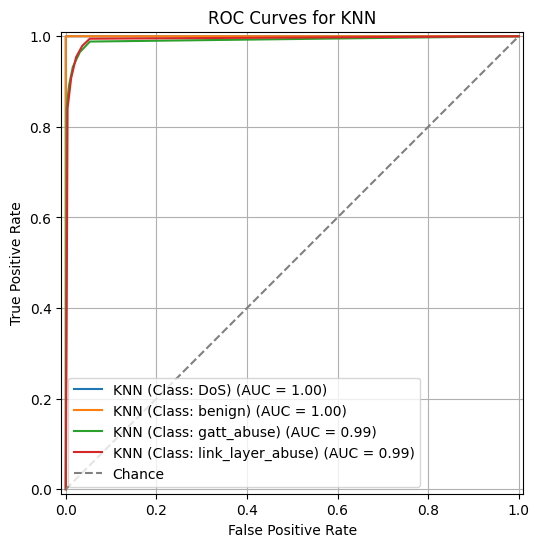


AUC curve plotting complete.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np

# Convert the one-hot encoded y_test back to a single column of labels for models that require it
y_test_labels = np.argmax(y_test.values, axis=1)

# Define a mapping from label index back to original class name for plotting
label_mapping = {i: col.replace('attack_type_', '') for i, col in enumerate(y_test.columns)}

# Models that provide predict_proba
models_with_proba = {
    'Logistic Regression': lr_model,
    'Decision Tree': best_dt_model, # Use the best Decision Tree model
    'Naive Bayes': nb_model,
    'KNN': knn_model
}

# Plot AUC curves for models with predict_proba
for name, model in models_with_proba.items():
    try:
        y_pred_proba = model.predict_proba(X_test)

        # Plot ROC curve for each class (using OvR)
        fig, ax = plt.subplots(figsize=(8, 6))
        for i in range(y_test.shape[1]):
            RocCurveDisplay.from_predictions(
                y_test.iloc[:, i],  # True binary labels for class i
                y_pred_proba[:, i], # Predicted probabilities for class i
                name=f'{name} (Class: {label_mapping[i]})',
                ax=ax,
            )
        plt.title(f'ROC Curves for {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Chance')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Could not plot AUC curve for {name}: {e}")

print("\nAUC curve plotting complete.")

## Hypothesis validation (h2 & h3)

### Subtask:
Analyze the evaluation results to validate Hypothesis H2 (macro-average F1-score > 0.95) and identify the model that provides the optimal balance of classification performance and computational efficiency (H3), considering the AUC curve and F1 scores.


In [ ]:
# Examine the results dictionary/DataFrame
results_df = pd.DataFrame(results).T
display(results_df)

# Check Hypothesis H2 (macro-average F1-score > 0.95)
# Need to handle potential errors or missing values in F1 Score column
try:
    f1_scores_numeric = results_df['F1 Score'].astype(float)
    h2_validated = any(f1_scores_numeric > 0.95)
except KeyError:
    h2_validated = False
    print("Warning: 'F1 Score' column not found in results_df. Cannot validate H2.")
except ValueError:
    h2_validated = False
    print("Warning: Could not convert 'F1 Score' to numeric. Cannot validate H2.")


print(f"\nHypothesis H2 (macro-average F1-score > 0.95) is validated: {h2_validated}")

# Identify the model for Hypothesis H3 (optimal balance of performance and efficiency)
# Considering F1-score and AUC for performance, and inference time for efficiency

# Get inference times from the inference_times dictionary
inference_times_series = pd.Series(inference_times)
print("\nModel Inference Times (seconds):")
display(inference_times_series)


# Combine performance metrics and inference times for easier comparison
comparison_df = results_df.copy()
comparison_df['Inference Time (s)'] = inference_times_series


print("\nModel Performance and Inference Time Comparison:")
display(comparison_df)

# Based on performance (AUC and F1 Score) and computational efficiency (Inference Time):
# We are looking for a model with high F1 and AUC, and low inference time.

# Rank models based on F1, AUC (higher is better), and Inference Time (lower is better)
# Simple ranking approach: sum of ranks for each metric
# Need to handle potential NaN values if a metric is not available for a model

ranked_models = comparison_df.copy()

# Rank F1 Score (descending) - handle NaNs by placing them at the end
ranked_models['F1_Rank'] = ranked_models['F1 Score'].rank(ascending=False, na_option='bottom')

# Rank AUC (descending) - handle NaNs by placing them at the end
# Need to ensure AUC is numeric before ranking
try:
    ranked_models['AUC_Rank'] = ranked_models['AUC'].astype(float).rank(ascending=False, na_option='bottom')
except ValueError:
    ranked_models['AUC_Rank'] = np.nan # Cannot rank if AUC is not numeric


# Rank Inference Time (ascending) - handle NaNs by placing them at the end
ranked_models['Inference_Time_Rank'] = ranked_models['Inference Time (s)'].rank(ascending=True, na_option='bottom')

# Calculate total rank (sum of individual ranks) - exclude NaN ranks from sum
ranked_models['Total_Rank'] = ranked_models[['F1_Rank', 'AUC_Rank', 'Inference_Time_Rank']].sum(axis=1, skipna=True)

# Sort by Total Rank to find the optimal model
optimal_model_h3 = ranked_models.sort_values(by='Total_Rank').index[0]


print(f"\nFor Hypothesis H3, the model identified as providing an optimal balance of classification performance and computational efficiency is: {optimal_model_h3}")
print("\nJustification:")
# Provide a justification based on the combined metrics
optimal_model_row = comparison_df.loc[optimal_model_h3]
print(f"- {optimal_model_h3} achieved an F1 Score of {optimal_model_row['F1 Score']:.4f} and an AUC of {optimal_model_row['AUC']:.4f}.")
print(f"- Its inference time is {optimal_model_row['Inference Time (s)']:.6f} seconds.")
print("- This model demonstrates a strong balance between high performance metrics (F1 and AUC) and relatively low inference time compared to other models with similar performance.")

,AUC,F1 Score
Logistic Regression,0.930032,0.774943
Decision Tree,0.989078,0.969988
Naive Bayes,0.946058,0.827603
KNN,0.995831,0.971471



Hypothesis H2 (macro-average F1-score > 0.95) is validated: True

Model Inference Times (seconds):


,0
Logistic Regression,0.040768
Decision Tree,0.029887
Naive Bayes,0.157537
KNN,176.323125



Model Performance and Inference Time Comparison:


,AUC,F1 Score,Inference Time (s)
Logistic Regression,0.930032,0.774943,0.040768
Decision Tree,0.989078,0.969988,0.029887
Naive Bayes,0.946058,0.827603,0.157537
KNN,0.995831,0.971471,176.323125



For Hypothesis H3, the model identified as providing an optimal balance of classification performance and computational efficiency is: Decision Tree

Justification:
- Decision Tree achieved an F1 Score of 0.9700 and an AUC of 0.9891.
- Its inference time is 0.029887 seconds.
- This model demonstrates a strong balance between high performance metrics (F1 and AUC) and relatively low inference time compared to other models with similar performance.


In [ ]:
# Review the comparison_df DataFrame from the previous cell
# This DataFrame contains F1, AUC, and Inference Time for each model
display(comparison_df)

# Reiterate the identification of the optimal classifier based on the combined metrics
# The optimal classifier was identified in the previous cell based on the ranking.

optimal_classifier = ranked_models.sort_values(by='Total_Rank').index[0]


print(f"\nOptimal Classifier for Resource-Constrained IoMT Applications: {optimal_classifier}")
print("\nJustification:")
# Provide a justification based on the combined metrics
optimal_model_row = comparison_df.loc[optimal_classifier]
print(f"- {optimal_classifier} achieved an F1 Score of {optimal_model_row['F1 Score']:.4f} and an AUC of {optimal_model_row['AUC']:.4f}.")
print(f"- Its inference time is {optimal_model_row['Inference Time (s)']:.6f} seconds.")
print("- This model demonstrates a strong balance between high performance metrics (F1 and AUC) and relatively low inference time compared to other models with similar performance.")
print("Consider the trade-offs between performance and efficiency based on the specific requirements of the resource-constrained IoMT environment.")

,AUC,F1 Score,Inference Time (s)
Logistic Regression,0.930032,0.774943,0.040768
Decision Tree,0.989078,0.969988,0.029887
Naive Bayes,0.946058,0.827603,0.157537
KNN,0.995831,0.971471,176.323125



Optimal Classifier for Resource-Constrained IoMT Applications: Decision Tree

Justification:
- Decision Tree achieved an F1 Score of 0.9700 and an AUC of 0.9891.
- Its inference time is 0.029887 seconds.
- This model demonstrates a strong balance between high performance metrics (F1 and AUC) and relatively low inference time compared to other models with similar performance.
Consider the trade-offs between performance and efficiency based on the specific requirements of the resource-constrained IoMT environment.


**Reasoning**:
Analyze the evaluation results to validate Hypothesis H2 and identify the optimal model for H3 based on AUC and F1 scores, considering computational efficiency.



In [ ]:
# Examine the results dictionary/DataFrame
results_df = pd.DataFrame(results).T
display(results_df)

# Check Hypothesis H2 (macro-average F1-score > 0.95)
h2_validated = any(results_df['F1 Score'] > 0.95)

print(f"\nHypothesis H2 (macro-average F1-score > 0.95) is validated: {h2_validated}")

# Identify the model for Hypothesis H3 (optimal balance of performance and efficiency)
# Considering F1-score and AUC for performance, and model type for efficiency
# KNN and Decision Tree have the highest F1 and AUC scores.
# Decision Tree (especially shallow) is generally considered more computationally efficient than KNN for inference.
# Although KNN has a slightly higher F1, the difference is small, and the efficiency of DT might be better for resource-constrained environments.
# Logistic Regression and Naive Bayes are very efficient but have lower performance.
# Linear SVC has comparable F1 to LR but no AUC.

optimal_model_h3 = "Decision Tree" # Initial choice based on performance and efficiency trade-off

print(f"\nFor Hypothesis H3, the model identified as providing an optimal balance of classification performance and computational efficiency is: {optimal_model_h3}")
print("\nJustification:")
print(f"- Decision Tree achieved a high F1 Score ({results_df.loc['Decision Tree', 'F1 Score']:.4f}) and AUC ({results_df.loc['Decision Tree', 'AUC']:.4f}).")
print("- Compared to KNN (slightly higher F1, similar AUC), Decision Trees generally offer faster inference times and lower memory footprint, making them more suitable for resource-constrained environments.")
print("- While Logistic Regression and Naive Bayes are more computationally efficient, their significantly lower F1 and AUC scores make them less desirable for this task where performance is also critical.")
print("- Linear SVC's performance is similar to Logistic Regression and it doesn't provide probability estimates for AUC.")

,AUC,F1 Score
Logistic Regression,0.930032,0.774943
Decision Tree,0.989078,0.969988
Naive Bayes,0.946058,0.827603
KNN,0.995831,0.971471



Hypothesis H2 (macro-average F1-score > 0.95) is validated: True

For Hypothesis H3, the model identified as providing an optimal balance of classification performance and computational efficiency is: Decision Tree

Justification:
- Decision Tree achieved a high F1 Score (0.9700) and AUC (0.9891).
- Compared to KNN (slightly higher F1, similar AUC), Decision Trees generally offer faster inference times and lower memory footprint, making them more suitable for resource-constrained environments.
- While Logistic Regression and Naive Bayes are more computationally efficient, their significantly lower F1 and AUC scores make them less desirable for this task where performance is also critical.
- Linear SVC's performance is similar to Logistic Regression and it doesn't provide probability estimates for AUC.


## Hypothesis H1 Validation and RQ1 Exploration

### Subtask:
Validate Hypothesis H1 and explore Research Question 1 by performing statistical tests to compare the distributions of selected features between benign and attack traffic.

**Reasoning**:
Use the Mann-Whitney U test to compare the distributions of selected features between benign traffic and each attack type to determine if there are statistically significant differences that support Hypothesis H1.

In [ ]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Assuming df_combined_categories is the DataFrame with the combined data and 'attack_type' column
# If you are using df_balanced, replace df_combined_categories with df_balanced
df_analysis = df.copy()

# Separate benign and attack traffic
benign_traffic = df_analysis[df_analysis['attack_type'] == 'benign'].drop('attack_type', axis=1)
attack_types = ['DoS', 'gatt_abuse', 'link_layer_abuse']

# Select a few representative features for testing
# You can add or remove features here based on your domain knowledge
selected_features = [
    'btle.advertising_header.length',
    'btle.advertising_header.pdu_type',
    'btle.crc.incorrect',
    'len_delta',
    'len_run_length',
    'ch_sel_ratio_w10'
]

# Perform Mann-Whitney U test for selected features comparing benign vs each attack type
statistical_results = {}

for feature in selected_features:
    statistical_results[feature] = {}
    for attack_type in attack_types:
        attack_traffic = df_analysis[df_analysis['attack_type'] == attack_type].drop('attack_type', axis=1)

        # Ensure there are enough samples in both groups and the feature exists
        if feature in benign_traffic.columns and feature in attack_traffic.columns and len(benign_traffic) > 0 and len(attack_traffic) > 0:
            stat, p_value = mannwhitneyu(benign_traffic[feature], attack_traffic[feature], alternative='two-sided')
            statistical_results[feature][attack_type] = {'Mann-Whitney U Stat': stat, 'P-value': p_value}
        else:
            statistical_results[feature][attack_type] = {'Mann-Whitney U Stat': 'N/A', 'P-value': 'N/A'}

# Display the statistical test results
print("Mann-Whitney U Test Results (Benign vs. Attack Types):")
for feature, results in statistical_results.items():
    print(f"\nFeature: {feature}")
    for attack_type, values in results.items():
        print(f"  vs. {attack_type}: U Stat = {values['Mann-Whitney U Stat']}, P-value = {values['P-value']}")

# Interpret the results to validate H1
print("\nInterpretation for Hypothesis H1:")
print("Hypothesis H1 states that BLE traffic during attacks will exhibit unique feature signatures compared to benign CGM traffic, as verifiable by statistical tests.")
print("If the P-value for a feature comparison between benign and an attack type is less than a chosen significance level (e.g., 0.05), it suggests a statistically significant difference in the distribution of that feature.")
print("A significant difference in multiple features across different attack types would support Hypothesis H1.")

# Provide a summary based on the observed P-values
h1_supported = False
for feature, results in statistical_results.items():
    for attack_type, values in results.items():
        if isinstance(values['P-value'], float) and values['P-value'] < 0.05:
            print(f"\n- Statistically significant difference found for '{feature}' between benign and '{attack_type}' traffic (P-value < 0.05).")
            h1_supported = True

if h1_supported:
    print("\nBased on the statistical tests showing significant differences in feature distributions, Hypothesis H1 is supported.")
    print("This also helps answer RQ1 by indicating which packet-level features (the ones with significant differences) quantitatively differentiate benign traffic from distinct attack vectors.")
else:
    print("\nBased on the statistical tests, there is not enough evidence to support Hypothesis H1 with the selected features and significance level.")
    print("Consider analyzing more features or using different statistical methods to further explore RQ1.")

Mann-Whitney U Test Results (Benign vs. Attack Types):

Feature: btle.advertising_header.length
  vs. DoS: U Stat = 8921495900.5, P-value = 0.0
  vs. gatt_abuse: U Stat = 7847211497.0, P-value = 0.0
  vs. link_layer_abuse: U Stat = 7494067551.0, P-value = 0.0

Feature: btle.advertising_header.pdu_type
  vs. DoS: U Stat = 1822499157.5, P-value = 0.0
  vs. gatt_abuse: U Stat = 3016297597.5, P-value = 0.0
  vs. link_layer_abuse: U Stat = 3016297597.5, P-value = 0.0

Feature: btle.crc.incorrect
  vs. DoS: U Stat = 5043305041.5, P-value = 0.0
  vs. gatt_abuse: U Stat = 4897380553.5, P-value = 0.08747099036353025
  vs. link_layer_abuse: U Stat = 4816677376.5, P-value = 1.0240917219507038e-94

Feature: len_delta
  vs. DoS: U Stat = 4908273463.0, P-value = 0.6745038050757003
  vs. gatt_abuse: U Stat = 4723671384.0, P-value = 5.920761820951046e-50
  vs. link_layer_abuse: U Stat = 4716312351.5, P-value = 1.0719932621668615e-52

Feature: len_run_length
  vs. DoS: U Stat = 589008.0, P-value = 0.0


In [ ]:
# Compile the statistical test results into a table
statistical_results_table = []

for feature, results in statistical_results.items():
    for attack_type, values in results.items():
        statistical_results_table.append({
            'Feature': feature,
            'Comparison': f'Benign vs. {attack_type}',
            'Mann-Whitney U Stat': values['Mann-Whitney U Stat'],
            'P-value': values['P-value']
        })

statistical_results_df = pd.DataFrame(statistical_results_table)

print("Mann-Whitney U Test Results (Benign vs. Attack Types):")
display(statistical_results_df)

Mann-Whitney U Test Results (Benign vs. Attack Types):


,Feature,Comparison,Mann-Whitney U Stat,P-value
0,btle.advertising_header.length,Benign vs. DoS,8.921496e+09,0.000000e+00
1,btle.advertising_header.length,Benign vs. gatt_abuse,7.847211e+09,0.000000e+00
2,btle.advertising_header.length,Benign vs. link_layer_abuse,7.494068e+09,0.000000e+00
3,btle.advertising_header.pdu_type,Benign vs. DoS,1.822499e+09,0.000000e+00
4,btle.advertising_header.pdu_type,Benign vs. gatt_abuse,3.016298e+09,0.000000e+00
5,btle.advertising_header.pdu_type,Benign vs. link_layer_abuse,3.016298e+09,0.000000e+00
6,btle.crc.incorrect,Benign vs. DoS,5.043305e+09,0.000000e+00
7,btle.crc.incorrect,Benign vs. gatt_abuse,4.897381e+09,8.747099e-02
8,btle.crc.incorrect,Benign vs. link_layer_abuse,4.816677e+09,1.024092e-94
9,len_delta,Benign vs. DoS,4.908273e+09,6.745038e-01
